In [36]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from torch import nn

# Reading Data

In [37]:
data = torch.load('./Data/Features/hog_features.pt')
for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 256) (55000,)
Val Data (X, y):  (5000, 256) (5000,)
Test Data (X, y):  (10000, 256) (10000,)


# Data Transformation

## PCA

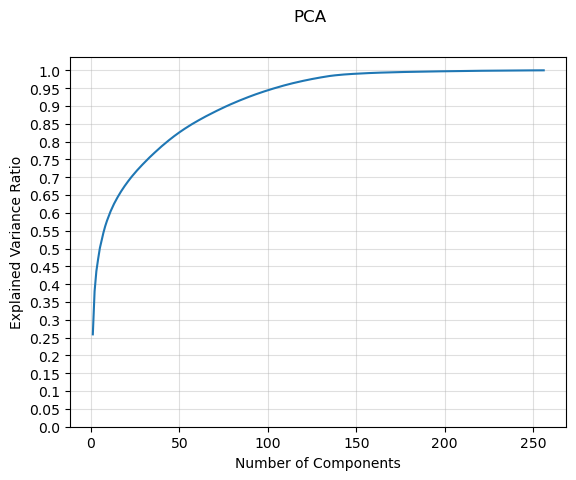

The least number of features to reach 95% variance:  104


In [38]:
pca = PCA()
pca.fit(data['train'][0])
explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratios)+1), explained_variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.suptitle('PCA')
plt.yticks(np.array(range(0, 105, 5))/100, np.array(range(0, 105, 5))/100)
plt.xticks(range(0, len(explained_variance_ratios)+1, 50), range(0, len(explained_variance_ratios)+1, 50))
plt.grid(True, alpha=0.4)
plt.show()

for i in range(len(explained_variance_ratios)):
    if(explained_variance_ratios[i] > 0.95):
        print("The least number of features to reach 95% variance: ", i+1)
        break

Based on this plot we can see that with 104 components we are able to explain about 95% of our variance.  
So, we will transform our data using n_components = 104

In [39]:
pca = PCA(n_components=104)
data['train'][0] = pca.fit_transform(data['train'][0])
data['val'][0] = pca.transform(data['val'][0])
data['test'][0] = pca.transform(data['test'][0])

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 104) (55000,)
Val Data (X, y):  (5000, 104) (5000,)
Test Data (X, y):  (10000, 104) (10000,)


## Normalization

In [40]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler().fit(data['train'][0])
data['train'][0] = normalizer.transform(data['train'][0])
data['val'][0] = normalizer.transform(data['val'][0])
data['test'][0] = normalizer.transform(data['test'][0])

## ANOVA Test

In [41]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# top_features = SelectPercentile(f_classif, percentile=90).fit_transform(*data['train'])
# top_features.shape

# EDA

In [42]:
# TODO
# Plot examples of each class

In [43]:
X_df = pd.DataFrame(data['train'][0])
y_df = pd.DataFrame(data['train'][1])

X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
count,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,...,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
mean,2.219460e-09,-8.045543e-09,-2.600930e-09,4.300204e-09,1.040372e-08,2.427535e-09,-1.255382e-08,-1.456521e-09,1.248446e-09,-2.531572e-09,...,1.179088e-09,-2.254139e-09,1.803311e-09,-5.895441e-10,3.329190e-09,1.109730e-09,-4.855069e-10,5.548650e-10,-9.155274e-09,-8.739125e-09
std,1.000005e+00,1.000007e+00,1.000004e+00,1.000007e+00,1.000006e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000007e+00,1.000007e+00,...,1.000004e+00,1.000007e+00,1.000006e+00,1.000003e+00,1.000006e+00,1.000007e+00,1.000004e+00,1.000002e+00,1.000006e+00,1.000003e+00
min,-1.373900e+00,-2.110866e+00,-2.751277e+00,-3.413028e+00,-2.656148e+00,-3.550793e+00,-3.943782e+00,-3.806838e+00,-3.483109e+00,-3.985826e+00,...,-5.735112e+00,-5.281111e+00,-5.096256e+00,-6.538437e+00,-5.430002e+00,-5.596561e+00,-5.902021e+00,-5.091145e+00,-4.534459e+00,-5.770032e+00
25%,-8.740638e-01,-8.017604e-01,-7.335091e-01,-6.576935e-01,-7.253753e-01,-6.264617e-01,-5.755843e-01,-6.856907e-01,-6.935013e-01,-6.605570e-01,...,-5.861384e-01,-5.924291e-01,-6.250931e-01,-4.139163e-01,-5.863718e-01,-6.057449e-01,-5.615877e-01,-6.250692e-01,-6.362706e-01,-6.142807e-01
50%,-3.921411e-01,-1.145817e-01,-4.726226e-02,-8.119487e-02,-5.569158e-02,-3.060650e-02,4.951135e-02,-4.909279e-02,-4.916765e-02,-2.501404e-02,...,1.285345e-02,-1.123552e-02,-8.498125e-03,-2.895265e-02,-2.539159e-03,5.927309e-03,-8.169907e-03,-1.781442e-02,-8.732195e-03,1.792970e-03
75%,8.610996e-01,6.739319e-01,5.397297e-01,5.454812e-01,6.660655e-01,5.486151e-01,6.551226e-01,6.083011e-01,6.093916e-01,6.209920e-01,...,5.852999e-01,5.983092e-01,6.322025e-01,3.643995e-01,5.899947e-01,6.091841e-01,5.453333e-01,6.162532e-01,6.225928e-01,6.267568e-01
max,2.070450e+00,2.327121e+00,3.257775e+00,4.513450e+00,3.991091e+00,4.138202e+00,3.945768e+00,4.482727e+00,4.381149e+00,4.501255e+00,...,6.688727e+00,6.450386e+00,5.370904e+00,6.594759e+00,5.784831e+00,5.879181e+00,6.294317e+00,5.911608e+00,4.910089e+00,6.006099e+00


As we can see, our columns are 0 mean and have a standard deviation of 1.

# Models

## Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(*data['train'])

train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
# test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      5490
           1       0.95      0.89      0.92      5498
           2       0.64      0.60      0.62      5515
           3       0.72      0.75      0.74      5536
           4       0.63      0.72      0.67      5496
           5       0.80      0.82      0.81      5518
           6       0.45      0.35      0.39      5518
           7       0.78      0.86      0.82      5472
           8       0.88      0.93      0.90      5462
           9       0.92      0.86      0.89      5495

    accuracy                           0.75     55000
   macro avg       0.75      0.75      0.75     55000
weighted avg       0.75      0.75      0.75     55000



In [45]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       510
           1       0.96      0.90      0.93       502
           2       0.64      0.61      0.62       485
           3       0.71      0.77      0.74       464
           4       0.65      0.70      0.67       504
           5       0.78      0.81      0.80       482
           6       0.42      0.35      0.38       482
           7       0.79      0.86      0.82       528
           8       0.90      0.92      0.91       538
           9       0.92      0.84      0.88       505

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



In [46]:
# print('Test Metrics')
# print(classification_report(data['test'][1], test_preds))

## Nearest Neighbour

100%|██████████| 29/29 [00:25<00:00,  1.15it/s]


The best k is :  5


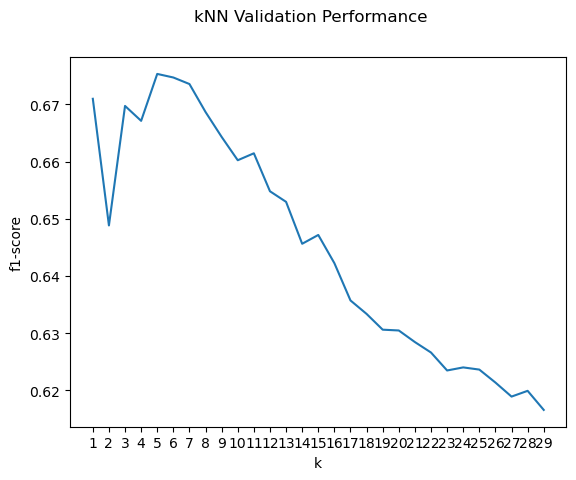

In [47]:
f1_scores = []
for k in tqdm(range(1, 30)):
    clf = KNeighborsClassifier(k).fit(*data['train'])
    score = f1_score(data['val'][1], clf.predict(data['val'][0]), average='macro')
    f1_scores.append(score)

print("The best k is : ", np.argmax(f1_scores)+1)
plt.plot(range(1, 30), f1_scores)
plt.xticks(range(1, 30), range(1, 30))
plt.xlabel('k')
plt.ylabel('f1-score')
plt.suptitle('kNN Validation Performance')
plt.show()


As we can see, we acheived the best validation f1 score with k=5

In [48]:
best_k = 5
clf = KNeighborsClassifier(n_neighbors=best_k).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
# test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      5490
           1       0.49      0.99      0.66      5498
           2       0.75      0.70      0.72      5515
           3       0.87      0.71      0.78      5536
           4       0.73      0.71      0.72      5496
           5       0.97      0.67      0.79      5518
           6       0.73      0.46      0.56      5518
           7       0.71      0.95      0.81      5472
           8       0.99      0.75      0.85      5462
           9       0.93      0.93      0.93      5495

    accuracy                           0.76     55000
   macro avg       0.80      0.76      0.76     55000
weighted avg       0.80      0.76      0.76     55000



In [49]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       510
           1       0.45      0.98      0.62       502
           2       0.65      0.58      0.62       485
           3       0.85      0.65      0.74       464
           4       0.62      0.60      0.61       504
           5       0.89      0.54      0.67       482
           6       0.54      0.31      0.39       482
           7       0.62      0.90      0.74       528
           8       1.00      0.66      0.80       538
           9       0.87      0.87      0.87       505

    accuracy                           0.68      5000
   macro avg       0.73      0.68      0.68      5000
weighted avg       0.73      0.68      0.68      5000



In [50]:
# print('Test Metrics')
# print(classification_report(data['test'][1], test_preds))

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
# test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5490
           1       1.00      1.00      1.00      5498
           2       1.00      1.00      1.00      5515
           3       1.00      1.00      1.00      5536
           4       1.00      1.00      1.00      5496
           5       1.00      1.00      1.00      5518
           6       1.00      1.00      1.00      5518
           7       1.00      1.00      1.00      5472
           8       1.00      1.00      1.00      5462
           9       1.00      1.00      1.00      5495

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [52]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       510
           1       0.92      0.92      0.92       502
           2       0.53      0.54      0.54       485
           3       0.67      0.72      0.69       464
           4       0.54      0.52      0.53       504
           5       0.76      0.78      0.77       482
           6       0.35      0.36      0.35       482
           7       0.77      0.78      0.78       528
           8       0.89      0.85      0.87       538
           9       0.88      0.86      0.87       505

    accuracy                           0.70      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.70      0.70      0.70      5000



In [53]:
# print('Test Metrics')
# print(classification_report(data['test'][1], test_preds))

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
# test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5490
           1       1.00      1.00      1.00      5498
           2       1.00      1.00      1.00      5515
           3       1.00      1.00      1.00      5536
           4       1.00      1.00      1.00      5496
           5       1.00      1.00      1.00      5518
           6       1.00      1.00      1.00      5518
           7       1.00      1.00      1.00      5472
           8       1.00      1.00      1.00      5462
           9       1.00      1.00      1.00      5495

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [55]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       510
           1       0.98      0.95      0.96       502
           2       0.71      0.70      0.70       485
           3       0.78      0.86      0.82       464
           4       0.69      0.72      0.70       504
           5       0.85      0.89      0.87       482
           6       0.55      0.48      0.51       482
           7       0.88      0.88      0.88       528
           8       0.92      0.92      0.92       538
           9       0.93      0.91      0.92       505

    accuracy                           0.81      5000
   macro avg       0.80      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



In [56]:
# print('Test Metrics')
# print(classification_report(data['test'][1], test_preds))

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
# test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      5490
           1       0.96      0.96      0.96      5498
           2       0.70      0.69      0.70      5515
           3       0.83      0.86      0.84      5536
           4       0.69      0.74      0.71      5496
           5       0.93      0.92      0.92      5518
           6       0.56      0.49      0.53      5518
           7       0.89      0.91      0.90      5472
           8       0.95      0.95      0.95      5462
           9       0.95      0.94      0.95      5495

    accuracy                           0.83     55000
   macro avg       0.82      0.83      0.83     55000
weighted avg       0.82      0.83      0.82     55000



In [58]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       510
           1       0.95      0.96      0.96       502
           2       0.70      0.70      0.70       485
           3       0.83      0.85      0.84       464
           4       0.72      0.74      0.73       504
           5       0.90      0.92      0.91       482
           6       0.54      0.50      0.52       482
           7       0.90      0.92      0.91       528
           8       0.94      0.94      0.94       538
           9       0.95      0.91      0.93       505

    accuracy                           0.83      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.83      0.82      5000



In [59]:
# print('Test Metrics')
# print(classification_report(data['test'][1], test_preds))

## SVM

In [60]:
from sklearn.svm import SVC

clf = SVC().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
# test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5490
           1       0.99      0.98      0.99      5498
           2       0.89      0.87      0.88      5515
           3       0.92      0.96      0.94      5536
           4       0.86      0.89      0.87      5496
           5       0.98      0.97      0.98      5518
           6       0.85      0.82      0.84      5518
           7       0.95      0.98      0.97      5472
           8       1.00      0.99      0.99      5462
           9       0.99      0.98      0.98      5495

    accuracy                           0.94     55000
   macro avg       0.94      0.94      0.94     55000
weighted avg       0.94      0.94      0.94     55000



In [61]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       510
           1       0.99      0.97      0.98       502
           2       0.77      0.74      0.76       485
           3       0.86      0.90      0.88       464
           4       0.75      0.74      0.75       504
           5       0.91      0.93      0.92       482
           6       0.62      0.62      0.62       482
           7       0.90      0.93      0.92       528
           8       0.97      0.96      0.97       538
           9       0.96      0.92      0.94       505

    accuracy                           0.86      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.86      0.86      0.86      5000



In [62]:
# print('Test Metrics')
# print(classification_report(data['test'][1], test_preds))

## Feed Forward Network

In [63]:
from torch.utils.data import Dataset, DataLoader

class fmnist_hog_features_dataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data[1])
    
    def __getitem__(self, index):
        X = self.data[0][index]
        y = torch.zeros(size =(10,))
        y[int(self.data[1][index])] = 1
        return torch.tensor(X), y
        
train_loader = DataLoader(fmnist_hog_features_dataset(data['train']))
val_loader = DataLoader(fmnist_hog_features_dataset(data['val']))
test_loader = DataLoader(fmnist_hog_features_dataset(data['test']))

In [64]:
from torch import nn

class FeedForwardNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU()
        )
        self.classification_head = nn.Sequential(
            nn.Linear(64, 10),
            nn.Softmax(dim=-1)
        )

    def forward(self, X):
        outs = self.linear(X)
        outs = self.classification_head(outs)
        return outs
    
# device = ("cuda" if torch.cuda.is_available() else "cpu")

feature_size = 104  # dimension of the feature vector after PCA
model = FeedForwardNetwork(feature_size)
print(model)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters())



FeedForwardNetwork(
  (linear): Sequential(
    (0): Linear(in_features=104, out_features=64, bias=True)
    (1): ReLU()
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
    (1): Softmax(dim=-1)
  )
)


In [71]:
train_loss = []
train_f1_score = []

val_loss = []
val_f1_score = []

num_epochs = 50

print('Training:')
for epoch in tqdm(range(0, num_epochs)):
    running_preds = []
    running_labels = []
    for batch, (X, y) in enumerate(train_loader):
        # X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        with torch.no_grad():
            running_preds.append(pred)
            running_labels.append(y)

    preds, labels = torch.vstack(running_preds), torch.vstack(running_labels)
    train_loss.append(loss_fn(preds, labels).item())
    # train_f1_score.append(f1_score(labels.argmax(-1).cpu(), preds.argmax(-1).cpu(), average='macro'))
    train_f1_score.append(f1_score(labels.argmax(-1), preds.argmax(-1), average='macro'))

    with torch.no_grad():
        running_preds = []
        running_labels = []
        for batch, (X,y) in enumerate(val_loader):
            # X, y = X.to(device), y.to(device)

            pred = model(X)

            running_preds.append(pred)
            running_labels.append(y)

        preds, labels = torch.vstack(running_preds), torch.vstack(running_labels)
        val_loss.append(loss_fn(preds, labels).item())   
        # val_f1_score.append(f1_score(labels.argmax(-1).cpu(), preds.argmax(-1).cpu(), average='macro'))
        val_f1_score.append(f1_score(labels.argmax(-1), preds.argmax(-1), average='macro'))


Training:


100%|██████████| 50/50 [27:42<00:00, 33.26s/it]


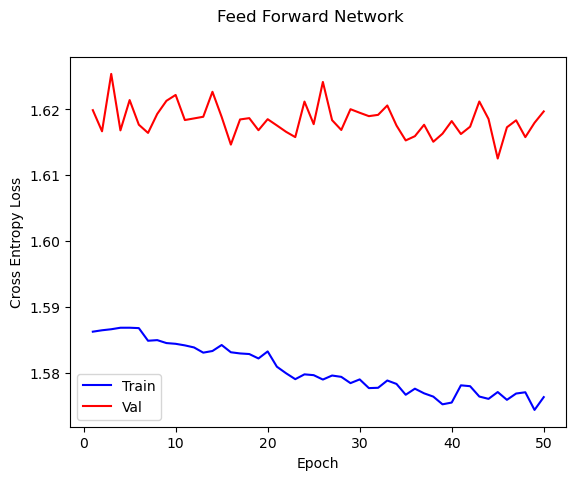

In [72]:
plt.plot(range(1, len(train_loss)+1), train_loss, label = 'Train', c='blue')
plt.plot(range(1, len(val_loss)+1), val_loss, label = 'Val', c='red')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.suptitle('Feed Forward Network')
plt.legend()
plt.show()

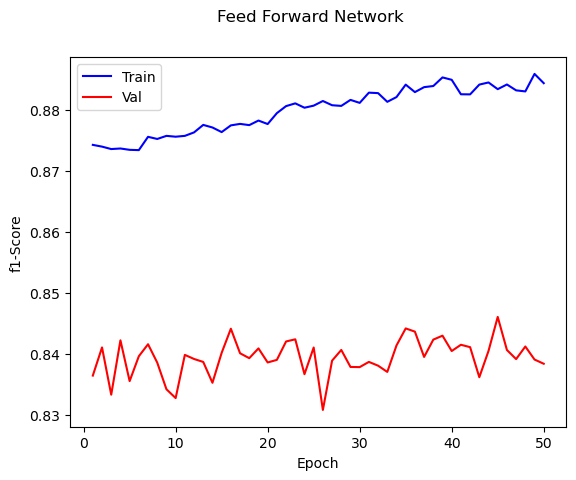

In [73]:
plt.plot(range(1, len(train_f1_score)+1), train_f1_score, label = 'Train', c='blue')
plt.plot(range(1, len(val_f1_score)+1), val_f1_score, label = 'Val', c='red')
plt.xlabel('Epoch')
plt.ylabel('f1-Score')
plt.suptitle('Feed Forward Network')
plt.legend()
plt.show()

In [74]:
with torch.no_grad():
    print('Train Metrics')
    print(classification_report(model(torch.tensor(data['train'][0])).argmax(-1), data['train'][1]))

Train Metrics
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5487
           1       0.97      0.99      0.98      5390
           2       0.84      0.79      0.82      5910
           3       0.92      0.86      0.89      5918
           4       0.81      0.82      0.81      5456
           5       0.95      0.95      0.95      5503
           6       0.67      0.75      0.71      4915
           7       0.95      0.93      0.94      5583
           8       0.96      0.97      0.97      5397
           9       0.96      0.97      0.96      5441

    accuracy                           0.89     55000
   macro avg       0.89      0.89      0.89     55000
weighted avg       0.89      0.89      0.89     55000



In [75]:
with torch.no_grad():
    print('Val Metrics')
    print(classification_report(model(torch.tensor(data['val'][0])).argmax(-1), data['val'][1]))

Val Metrics
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       515
           1       0.96      0.98      0.97       494
           2       0.76      0.69      0.72       540
           3       0.88      0.84      0.86       489
           4       0.71      0.74      0.72       484
           5       0.92      0.90      0.91       491
           6       0.57      0.63      0.60       431
           7       0.93      0.89      0.91       549
           8       0.93      0.96      0.95       521
           9       0.92      0.95      0.93       486

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



## Transformer